Looking at the problems first. We choose make blobs and make moons to look at how MPA performs against SVM head to head on some synthetic datasets with known, basic properties. 
Make moon random state = 3, noise = 0.18
train test split random state = 12

In [1]:
import numpy as np
from scipy.interpolate import make_smoothing_spline
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.datasets import make_moons

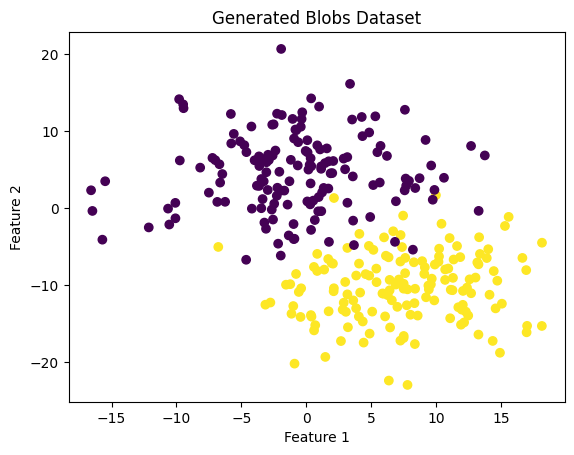

In [2]:
X, y = make_blobs(n_features=2, n_samples=300, random_state = 14, centers = 2, cluster_std = 5)
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated Blobs Dataset")
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 12)

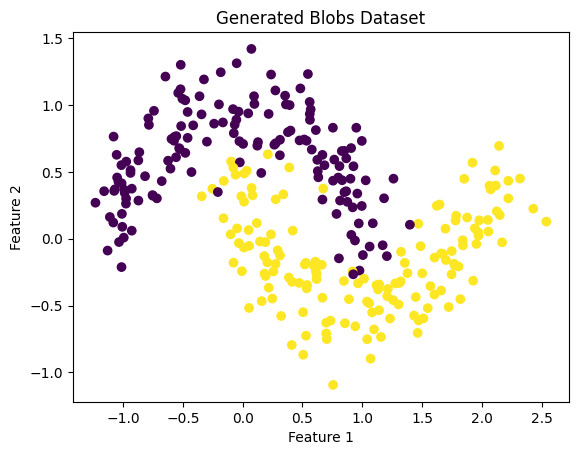

In [4]:
X, y = make_moons(n_samples=300, random_state = 7, noise = 0.20)
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated Blobs Dataset")
plt.show()

In [5]:
scaler = StandardScaler()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 12)

In [7]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [8]:
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'kernel': ['linear']  # Explicitly set to 'linear'
}

# Create an instance of SVM
svm = SVC(random_state=42)

# Instantiate the GridSearchCV object:
# - 'svm' is the estimator
# - 'param_grid' defines the parameters to try
# - 'cv=5' means 5-fold cross-validation
# - 'scoring='accuracy'' uses accuracy to compare model performance
# - 'n_jobs=-1' uses all processors for computation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train_std, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("Best cross-validation score: {:.2f}".format(best_score))

# Evaluate the best model on the test set
best_model_new = grid_search.best_estimator_
test_score = best_model_new.score(X_test_std, y_test)
print("Test set score with best model: {:.2f}".format(test_score))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score: 0.85
Test set score with best model: 0.92


In [9]:
print("\nClassification Report:")
print(classification_report(y_test, best_model_new.predict(X_test_std)))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91        28
           1       0.89      0.97      0.93        32

    accuracy                           0.92        60
   macro avg       0.92      0.91      0.92        60
weighted avg       0.92      0.92      0.92        60



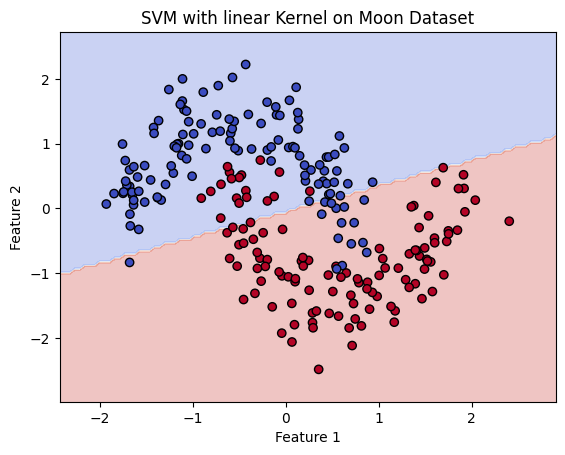

In [10]:
xx, yy = np.meshgrid(np.linspace(X_train_std[:,0].min()-0.5, X_train_std[:,0].max()+0.5, 100),
                     np.linspace(X_train_std[:,1].min()-0.5, X_train_std[:,1].max()+0.5, 100))
Z = best_model_new.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_std[:,0], X_train_std[:,1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM with linear Kernel on Moon Dataset")
plt.show()

In [11]:
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  # Focus on meaningful C values
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Balanced range
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],  # Poly kernel only
    'coef0': [0, 1],  # Sigmoid & poly only, keeping it simple
}


# Create an instance of SVM
svm = SVC(random_state=42)

# Instantiate the GridSearchCV object:
# - 'svm' is the estimator
# - 'param_grid' defines the parameters to try
# - 'cv=5' means 5-fold cross-validation
# - 'scoring='accuracy'' uses accuracy to compare model performance
# - 'n_jobs=-1' uses all processors for computation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train_std, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("Best cross-validation score: {:.2f}".format(best_score))

# Evaluate the best model on the test set
best_model_new = grid_search.best_estimator_
test_score = best_model_new.score(X_test_std, y_test)
print("Test set score with best model: {:.2f}".format(test_score))

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
Best parameters found:  {'C': 10, 'coef0': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Best cross-validation score: 0.98
Test set score with best model: 0.92


In [12]:
print("\nClassification Report:")
print(classification_report(y_test, best_model_new.predict(X_test_std)))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91        28
           1       0.89      0.97      0.93        32

    accuracy                           0.92        60
   macro avg       0.92      0.91      0.92        60
weighted avg       0.92      0.92      0.92        60



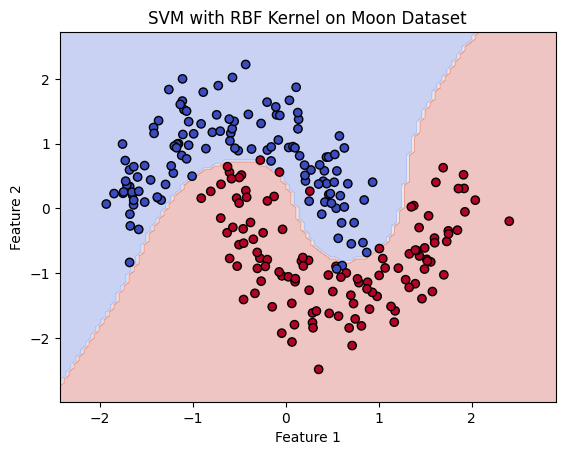

In [13]:
xx, yy = np.meshgrid(np.linspace(X_train_std[:,0].min()-0.5, X_train_std[:,0].max()+0.5, 100),
                     np.linspace(X_train_std[:,1].min()-0.5, X_train_std[:,1].max()+0.5, 100))
Z = best_model_new.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_std[:,0], X_train_std[:,1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM with RBF Kernel on Moon Dataset")
plt.show()

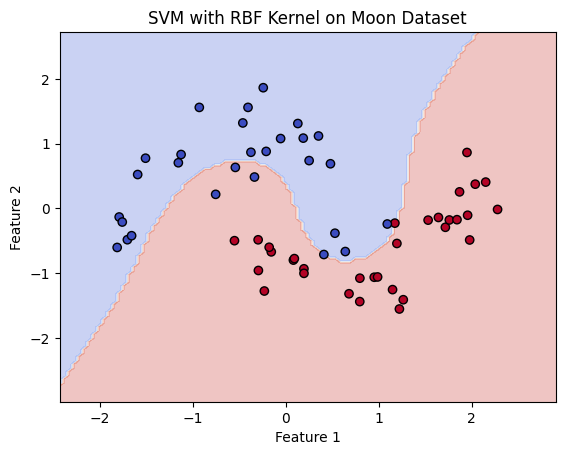

In [14]:
xx, yy = np.meshgrid(np.linspace(X_train_std[:,0].min()-0.5, X_train_std[:,0].max()+0.5, 100),
                     np.linspace(X_train_std[:,1].min()-0.5, X_train_std[:,1].max()+0.5, 100))
Z = best_model_new.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test_std[:,0], X_test_std[:,1], c=y_test, cmap='coolwarm', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM with RBF Kernel on Moon Dataset")
plt.show()

In [15]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy.interpolate import make_smoothing_spline

class MPA2D_Spline(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.005, epochs=50, random_state=7, verbose=False,
                 lambda_scaling='log', patience=5, decay_factor=0.5, min_learning_rate=1e-6,
                 n_control_points=5, smoothing_lambda=0.1):
        self.learning_rate = learning_rate
        self.initial_learning_rate = learning_rate
        self.epochs = epochs
        self.random_state = random_state
        self.verbose = verbose
        self.lambda_scaling = lambda_scaling
        self.patience = patience
        self.decay_factor = decay_factor
        self.min_learning_rate = min_learning_rate
        self.n_control_points = n_control_points
        self.smoothing_lambda = smoothing_lambda
        self.error_history_ = []
        self.learning_rate_history_ = []
        if lambda_scaling not in ['log', 'sqrt', 'none']:
            raise ValueError("lambda_scaling must be one of 'log', 'sqrt', or 'none'")
        np.random.seed(random_state)

    def _calculate_means(self, X, y):
        mask_1 = y == 1
        self.m1 = X[mask_1].mean(axis=0)
        self.m0 = X[~mask_1].mean(axis=0)

    def _initialize_control_points(self, X):
        x_min, x_max = X[:, 0].min(), X[:, 0].max()
        y_min, y_max = X[:, 1].min(), X[:, 1].max()
        self.control_x = np.linspace(x_min, x_max, self.n_control_points).copy()  # Make it adjustable
        y_mid = (self.m0[1] + self.m1[1]) / 2
        self.control_y = np.random.uniform(y_mid - (y_max - y_min) * 0.1,
                                          y_mid + (y_max - y_min) * 0.1,
                                          self.n_control_points)
        self.initial_control_x = self.control_x.copy()  # Store initial x too
        self.initial_control_y = self.control_y.copy()

    def _fit_spline(self):
        self.spline = make_smoothing_spline(self.control_x, self.control_y, lam=self.smoothing_lambda)

    def _calculate_displacement(self, X):
        spline_y = self.spline(X[:, 0])
        return X[:, 1] - spline_y

    def _update_pseudo_labels(self, X, y):
        m1_displacement = self._calculate_displacement(self.m1.reshape(1, -1))[0]
        self.class_1_pseudo = 1 if m1_displacement > 0 else -1
        self.class_0_pseudo = -self.class_1_pseudo
        return np.where(y == 1, self.class_1_pseudo, self.class_0_pseudo)

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        if not set(self.classes_).issubset({0, 1}):
            raise ValueError("Labels must be 0 and 1")
        if X.shape[1] != 2:
            raise ValueError("This is a 2D-only algorithm for now!")
        X = np.asarray(X)
        y = np.asarray(y)

        self._calculate_means(X, y)
        self._initialize_control_points(X)
        self._fit_spline()

        best_error = float('inf')
        best_control_x = None
        best_control_y = None
        best_class_1_pseudo = None
        patience_counter = 0
        current_learning_rate = self.initial_learning_rate

        self.error_history_ = []
        self.learning_rate_history_ = []

        indices_class_0 = np.where(y == 0)[0]
        indices_class_1 = np.where(y == 1)[0]

        for epoch in range(self.epochs):
            self._fit_spline()
            pseudo_labels = self._update_pseudo_labels(X, y)
            displacements = self._calculate_displacement(X)
            errors = (displacements * pseudo_labels <= 0)
            error_count = np.sum(errors)

            self.error_history_.append(error_count)
            self.learning_rate_history_.append(current_learning_rate)

            if self.verbose and epoch % 10 == 0:
                print(f"Epoch {epoch}: Errors = {error_count}, LR = {current_learning_rate:.6f}")

            if error_count < best_error:
                best_error = error_count
                best_control_x = self.control_x.copy()
                best_control_y = self.control_y.copy()
                best_class_1_pseudo = self.class_1_pseudo
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= self.patience:
                    current_learning_rate = max(current_learning_rate * self.decay_factor, self.min_learning_rate)
                    patience_counter = 0
                    if current_learning_rate == self.min_learning_rate:
                        if self.verbose:
                            print(f"Min LR reached at epoch {epoch}")
                        break

            if errors.any():
                error_indices = np.where(errors)[0]
                for idx in error_indices:
                    d = X[idx]
                    distances = np.abs(self.control_x - d[0])
                    nearest_idx = np.argmin(distances)
                    distance = distances[nearest_idx]
                    lmbda = (np.log1p(distance) if self.lambda_scaling == 'log' else
                            np.sqrt(distance) if self.lambda_scaling == 'sqrt' else distance)

                    # Determine opposite class's correctly classified points
                    if y[idx] == 1:  # Misclassified class 1 point
                        opp_indices = indices_class_0
                    else:  # Misclassified class 0 point
                        opp_indices = indices_class_1

                    # Find correctly classified points in opposite class
                    opp_displacements = displacements[opp_indices]
                    opp_labels = pseudo_labels[opp_indices]
                    correct_opp = opp_indices[opp_displacements * opp_labels > 0]

                    if len(correct_opp) > 0:
                        # Pick a random subset of correctly classified opposite class points
                        n_random = max(1, len(correct_opp) // 2)  # Take half, at least 1
                        random_correct = np.random.choice(correct_opp, size=n_random, replace=False)
                        # Average 2D position of the random subset
                        random_avg_opp = np.mean(X[random_correct], axis=0)  # [x, y]
                        # Calculate 2D difference to move toward this random avg
                        delta_x = random_avg_opp[0] - self.control_x[nearest_idx]
                        delta_y = random_avg_opp[1] - self.control_y[nearest_idx]
                        # Apply step in both directions
                        step_x = delta_x * lmbda * current_learning_rate
                        step_y = delta_y * lmbda * current_learning_rate

                        # Constrain step_x to maintain ascending order
                        if nearest_idx > 0:
                            min_x = self.control_x[nearest_idx - 1] + 1e-6  # Small buffer to avoid equality
                            step_x = max(step_x, min_x - self.control_x[nearest_idx])
                        if nearest_idx < len(self.control_x) - 1:
                            max_x = self.control_x[nearest_idx + 1] - 1e-6
                            step_x = min(step_x, max_x - self.control_x[nearest_idx])
                    else:
                        # Fallback: Use original direction (y-only) if no correct points
                        step_x = 0  # No x movement in fallback
                        step_y = -pseudo_labels[idx] * lmbda * current_learning_rate

                    self.control_x[nearest_idx] += step_x
                    self.control_y[nearest_idx] += step_y

        # Store the last control points from the final epoch
        self.last_control_x = self.control_x.copy()
        self.last_control_y = self.control_y.copy()
        # Restore best for prediction
        self.control_x = best_control_x
        self.control_y = best_control_y
        self._fit_spline()
        self.class_1_pseudo = best_class_1_pseudo
        return self

    def predict(self, X):
        X = np.asarray(X)
        displacements = self._calculate_displacement(X)
        return np.where(displacements > 0,
                        1 if self.class_1_pseudo > 0 else 0,
                        0 if self.class_1_pseudo > 0 else 1)

    def plot_convergence(self, figsize=(12, 5)):
        try:
            import matplotlib.pyplot as plt
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
            ax1.plot(self.error_history_, 'b-', label='Errors')
            ax1.set_title('Error Convergence')
            ax1.set_xlabel('Epoch')
            ax1.set_ylabel('Number of Errors')
            ax1.grid(True)
            ax2.plot(self.learning_rate_history_, 'r-', label='Learning Rate')
            ax2.set_title('Learning Rate Decay')
            ax2.set_xlabel('Epoch')
            ax2.set_ylabel('Learning Rate')
            ax2.set_yscale('log')
            ax2.grid(True)
            plt.tight_layout()
            return fig
        except ImportError:
            print("Install matplotlib with 'pip install matplotlib'!")
            return None

    def plot_boundary(self, X, y, figsize=(8, 6)):
        try:
            import matplotlib.pyplot as plt
            fig = plt.figure(figsize=figsize)
            plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.5)

            # Plot initial spline
            initial_spline = make_smoothing_spline(self.initial_control_x, self.initial_control_y, lam=self.smoothing_lambda)
            x_range = np.linspace(X[:, 0].min(), 60, 100)                                                                     ## Need to hardcode x range because otherwise spline shoots up
            y_initial = initial_spline(x_range)                                                                               ## and we don't need such high y values
            plt.plot(x_range, y_initial, 'r--', label='Initial Boundary', alpha=0.7)

            # Plot last spline (from final epoch)
            last_spline = make_smoothing_spline(self.last_control_x, self.last_control_y, lam=self.smoothing_lambda)
            y_last = last_spline(x_range)
            plt.plot(x_range, y_last, 'g-', label='Last Boundary')

            # Plot control points
            plt.scatter(self.initial_control_x, self.initial_control_y, c='orange', marker='o', label='Initial Control Points', alpha=0.7)
            plt.scatter(self.last_control_x, self.last_control_y, c='k', marker='x', label='Last Control Points')

            plt.legend()
            plt.title('MPA2D_Spline Decision Boundary: Initial vs Last')
            return fig
        except ImportError:
            print("Install matplotlib with 'pip install matplotlib'!")
            return None

In [16]:
scaler = MinMaxScaler(feature_range=(-100,100))
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.transform(X_test)

In [17]:
# Initialize and fit the model
model = MPA2D_Spline(
    learning_rate=0.002,
    epochs=100,
    verbose=True,
    n_control_points=9,
    smoothing_lambda=0.00001,
    decay_factor=0.99,
    random_state = 21
)

In [18]:
model.fit(X_train_minmax, y_train)

Epoch 0: Errors = 34, LR = 0.002000
Epoch 10: Errors = 22, LR = 0.002000
Epoch 20: Errors = 19, LR = 0.001980
Epoch 30: Errors = 23, LR = 0.001941
Epoch 40: Errors = 13, LR = 0.001941
Epoch 50: Errors = 12, LR = 0.001921
Epoch 60: Errors = 11, LR = 0.001902
Epoch 70: Errors = 10, LR = 0.001864
Epoch 80: Errors = 10, LR = 0.001845
Epoch 90: Errors = 9, LR = 0.001809


MPA2D_Spline(decay_factor=0.99, epochs=100, learning_rate=0.002,
             n_control_points=9, random_state=21, smoothing_lambda=1e-05,
             verbose=True)

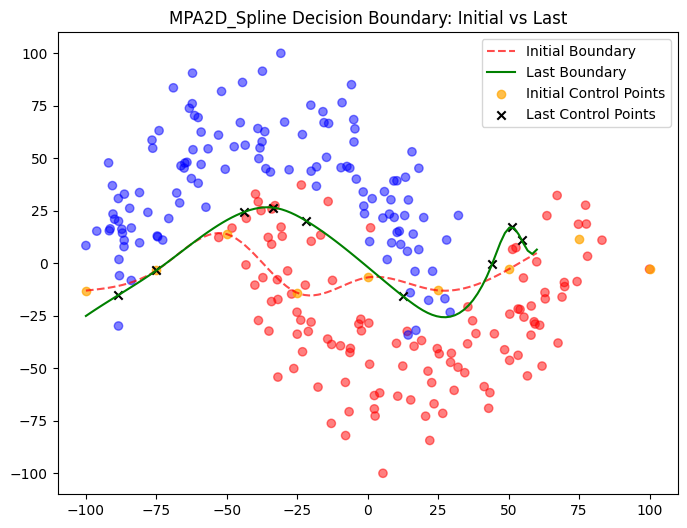

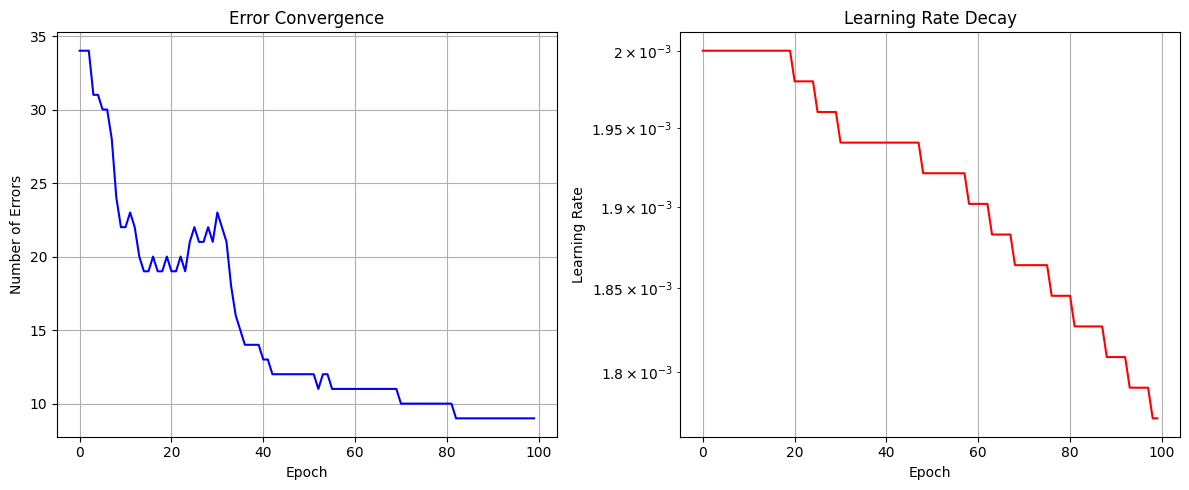

In [19]:
# Plot the decision boundary and convergence
model.plot_boundary(X_train_minmax, y_train)
model.plot_convergence()
plt.show()

In [20]:
print("\nClassification Report:")
print(classification_report(y_test,model.predict(X_test_minmax)))
cr = classification_report(y_test, model.predict(X_test_minmax))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        28
           1       0.91      1.00      0.96        32

    accuracy                           0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



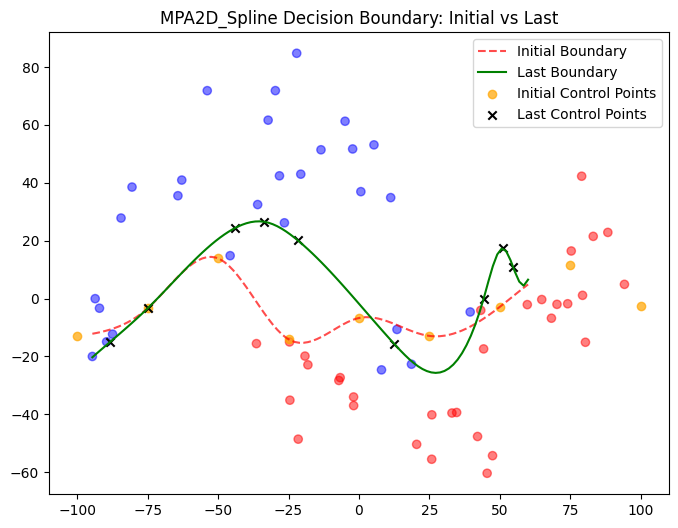

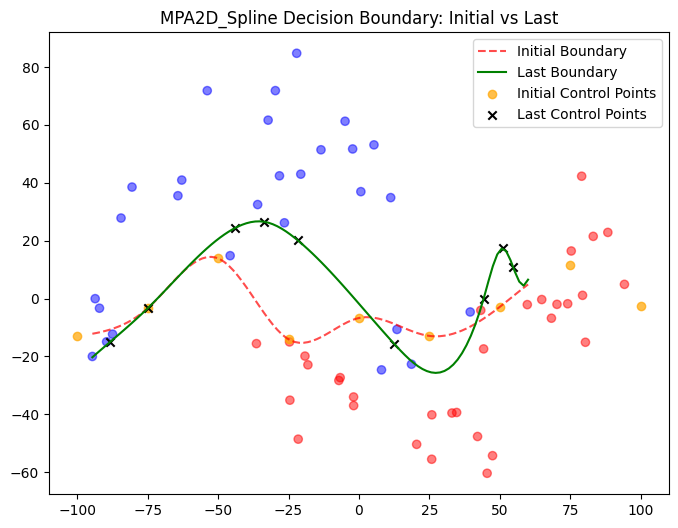

In [21]:
model.plot_boundary(X_test_minmax, y_test)

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

svm_pipe = make_pipeline(StandardScaler(), SVC(**best_params))  # From your grid search
mpa_pipe = make_pipeline(MinMaxScaler(feature_range=(-100, 100)), model)

svm_scores = cross_val_score(svm_pipe, X, y, cv=20, scoring='accuracy')
mpa_scores = cross_val_score(mpa_pipe, X, y, cv=20, scoring='accuracy')

print("SVM CV Accuracy:", svm_scores.mean(), "±", svm_scores.std())
print("MPA CV Accuracy:", mpa_scores.mean(), "±", mpa_scores.std())

Epoch 0: Errors = 45, LR = 0.002000
Epoch 10: Errors = 23, LR = 0.002000
Epoch 20: Errors = 23, LR = 0.001980
Epoch 30: Errors = 20, LR = 0.001980
Epoch 40: Errors = 17, LR = 0.001941
Epoch 50: Errors = 17, LR = 0.001902
Epoch 60: Errors = 17, LR = 0.001864
Epoch 70: Errors = 17, LR = 0.001827
Epoch 80: Errors = 15, LR = 0.001791
Epoch 90: Errors = 16, LR = 0.001773
Epoch 0: Errors = 46, LR = 0.002000
Epoch 10: Errors = 33, LR = 0.002000
Epoch 20: Errors = 21, LR = 0.002000
Epoch 30: Errors = 18, LR = 0.002000
Epoch 40: Errors = 16, LR = 0.001960
Epoch 50: Errors = 18, LR = 0.001921
Epoch 60: Errors = 19, LR = 0.001883
Epoch 70: Errors = 19, LR = 0.001845
Epoch 80: Errors = 21, LR = 0.001827
Epoch 90: Errors = 21, LR = 0.001791
Epoch 0: Errors = 40, LR = 0.002000
Epoch 10: Errors = 32, LR = 0.002000
Epoch 20: Errors = 19, LR = 0.002000
Epoch 30: Errors = 18, LR = 0.001980
Epoch 40: Errors = 16, LR = 0.001960
Epoch 50: Errors = 17, LR = 0.001921
Epoch 60: Errors = 15, LR = 0.001902
Epoc

In [23]:
from scipy.stats import ttest_rel
t_stat, p_value = ttest_rel(svm_scores, mpa_scores)
print("P-value:", p_value)

P-value: 0.08803072446440367
